# MID TERM PROJECT


Back Ground:

Cab booking system is the process where renting a cab is automated through an app 
throughout a city. Using this app, people can book a cab from one location to another location. 
Being a cab booking app company, exploiting the understanding of cab supply and demand 
could increase the efficiency of their service and enhance user experience by minimizing 
waiting time.
Objective of this project is to combine historical usage pattern along with the open data sources 
like weather data to forecast cab booking demand in a city.

Process Flow:


You will be provided with hourly renting data span of two years. Data is randomly divided into 
train and test set. You must predict the total count of cabs booked in each hour covered by the 
test set, using the information available prior to the booking period. You need to append the 
train_label dataset to train.csv as ‘Total_booking’ column.

Descriptions of the columns:

## Libraries

In [132]:
#importing the required libraries
import pandas as pd #loading the data
import numpy as np 
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures #for preprocessing the data
from sklearn.linear_model import LinearRegression #regression model
from sklearn.model_selection import train_test_split #for splitting the dataset for score
from sklearn.linear_model import LogisticRegression #regression model
from sklearn.metrics import r2_score #score of regression model 
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [11]:
os.chdir(r'G:\CAREER\EDUCATION\POST GRADUATION\AI & ML NIT WARANGAL PGP\Subjects\Mid term Project 1\Dataset')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_label_data = pd.read_csv('train_label.csv')
test_label_data = pd.read_csv('test_label.csv')


## Description/Viewing of Data

In [13]:
train_data.head() #returns first 5 rows of the dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [18]:
#checking the length of the data
train_data.shape

(8708, 9)

There are 8708 rows and 9 features 

In [15]:
train_data.dtypes #returns datatypes of data

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [17]:
#Checking the Unique values of the columns 
season_unique_values = train_data['season'].unique()
weather_unique_values = train_data['weather'].unique()
print('Unique values of season are: ',season_unique_values)
print('Unique values of weather are: ',weather_unique_values)

Unique values of season are:  ['Summer' 'Fall' 'Spring' 'Winter']
Unique values of weather are:  [' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']


In [22]:
#Description of Data
train_data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900


From the above values:
- The holiday and workingday columns are ignored because they are encoded values 
- Temperature mean value is 20.24 C
- atemp mean value is 23.65 C which is approximately 3 C higher than actual temperature. Here atemp 
  means real feeling of the temperature


Similarly for testing dataset

In [19]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [21]:
test_data.shape

(2178, 9)

Similarly check the label data before joining it to main data

In [23]:
train_label_data.head()

,504
0,5
1,139
2,209
3,184
4,791


In [24]:
test_label_data.head()

,256
0,87
1,11
2,84
3,668
4,53


We can see from the above two lines:
- 504 is taken as column in train data
- 256 is taken as column in test data
- So these two values must be included in the dataset column 'Total_booking'

## Merging the train and test label to train and test dataset

In [25]:
#Adding the 504 & 256 to train and test 
train_list = [504] + list(train_label_data['504'])
test_list = [256] + list(test_label_data['256'])

In [26]:
#Appending the list to the train and test data
train_data['total_booking'] = train_list
test_data['total_booking'] = test_list

In [28]:
#checking the above operation
train_data.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [29]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


## Preprocessing of data

In [32]:
#Converting the datetime column to datetime format
train_df = train_data.copy()
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df = test_data.copy()
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [33]:
#Appending new columns of datetime to the data
train_df['WeekDay'] = train_df['datetime'].apply(lambda x: x.strftime('%A'))
train_df['Day'] = train_df['datetime'].apply(lambda x: x.strftime('%d'))
train_df['Time'] = train_df['datetime'].apply(lambda x: x.strftime('%X'))
train_df['Month'] = train_df['datetime'].apply(lambda x: x.strftime('%B'))
train_df['Year'] = train_df['datetime'].apply(lambda x: x.strftime('%Y'))

test_df['WeekDay'] = test_df['datetime'].apply(lambda x: x.strftime('%A'))
test_df['Day'] = test_df['datetime'].apply(lambda x: x.strftime('%d'))
test_df['Time'] = test_df['datetime'].apply(lambda x: x.strftime('%X'))
test_df['Month'] = test_df['datetime'].apply(lambda x: x.strftime('%B'))
test_df['Year'] = test_df['datetime'].apply(lambda x: x.strftime('%Y'))


In [34]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,WeekDay,Day,Time,Month,Year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,Wednesday,02,19:00:00,May,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,Wednesday,05,04:00:00,September,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,Thursday,13,09:00:00,January,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,Friday,18,16:00:00,November,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,Tuesday,13,13:00:00,September,2011


Similarly for test data

In [35]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,WeekDay,Day,Time,Month,Year
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,Thursday,10,11:00:00,May,2012
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,Saturday,09,07:00:00,June,2012
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,Sunday,06,20:00:00,March,2011
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,Thursday,13,11:00:00,October,2011
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,Saturday,02,12:00:00,June,2012


## Visualizing the data

#### Season vs Total Bookings

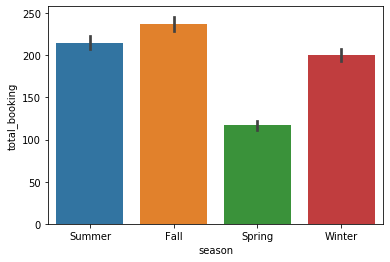

In [37]:
sns.barplot(data = train_df,x = 'season',y = 'total_booking')

Data Analysis from the Season Vs graph:
- From the above bar plot we can tell the maximum number of bookings is in Fall season.
- Second Maximum number of bookings is in Summer season 
- We can say that maximum number of bookings is during Holidays
- We can also say that during Fall season people tend to go to workplaces in cabs hence the booking     is high
- We can ask the cab company to increase the number of cab services during Fall & Summer seasons

#### Month Vs Total Bookings

In [40]:
#checking the unique months in the dataset
train_df['Month'].unique

<bound method Series.unique of 0             May
1       September
2         January
3        November
4       September
          ...    
8703      January
8704     November
8705        April
8706     November
8707      January
Name: Month, Length: 8708, dtype: object>

In [42]:
le = LabelEncoder()
month_df = train_df.copy()
month_df['Month'] = month_df['datetime'].apply(lambda x: x.strftime('%m'))

In [43]:
month_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,WeekDay,Day,Time,Month,Year
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,Wednesday,02,19:00:00,05,2012
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,Wednesday,05,04:00:00,09,2012
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,Thursday,13,09:00:00,01,2011
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,Friday,18,16:00:00,11,2011
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,Tuesday,13,13:00:00,09,2011


In [45]:
month_df.groupby(['Month']).sum()['total_booking']

Month
01     63086
02     77963
03    108905
04    132588
05    161566
06    178391
07    174264
08    172371
09    172913
10    166361
11    141024
12    131273
Name: total_booking, dtype: int64

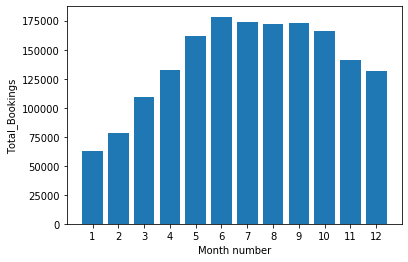

In [46]:
months = range(1,13)
plt.bar(months,month_df.groupby(['Month']).sum()['total_booking'])
plt.xticks(months)
plt.ylabel('Total_Bookings')
plt.xlabel('Month number')
plt.show()

Data Analysis from Month vs Total_Bookings:
- June month has highest number of bookings
- Least number of bookings is in January
- From May to June the number of bookings are more or less same


#### Working day Vs Non working day:

In [50]:
workingday_df = train_df.copy()
workingday_df = workingday_df.loc[(workingday_df['workingday'] == 1)]

In [51]:
workingday_df.sum()['total_booking']

1152431

In [53]:
non_workingday_df = train_df.copy()
non_workingday_df = non_workingday_df.loc[(non_workingday_df['workingday'] == 0)]
non_workingday_df.sum()['total_booking']

528274

From the above data:
- Number of bookings during working days is more than non working days
- Majority of days in a year are working days so the number of bookings is more
- This may be due to people travelling more morning and evening for office work

#### Time of the day Vs Total Bookings

In [54]:
time_of_day = train_df.sort_values(by = 'Time')

In [57]:
time_of_day['Time'].unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [58]:
time_of_day.groupby(['Time']).sum()['total_booking']


Time
00:00:00     19673
01:00:00     11975
02:00:00      8361
03:00:00      4153
04:00:00      2208
05:00:00      7052
06:00:00     27368
07:00:00     77764
08:00:00    127856
09:00:00     84036
10:00:00     65696
11:00:00     78187
12:00:00     95434
13:00:00     97915
14:00:00     85972
15:00:00     95438
16:00:00    116942
17:00:00    173281
18:00:00    156788
19:00:00    115587
20:00:00     83121
21:00:00     63007
22:00:00     49585
23:00:00     33306
Name: total_booking, dtype: int64

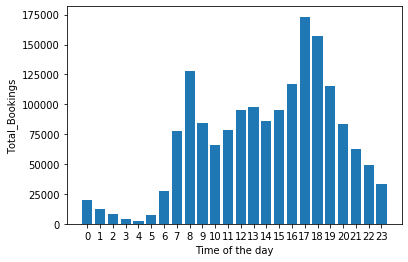

In [68]:
plt.bar(time_list,time_of_day.groupby(['Time']).sum()['total_booking'])
plt.xticks(range(0,24))
plt.ylabel('Total_Bookings')
plt.xlabel('Time of the day')
plt.show()

Data Analysis from Time Vs Total Bookings:
- Maximum bookings were durng 5 PM : It may be due to the people returning to home from office during that time. Also next maximum number of bookings were during 6PM
- Also at 8AM we have good number of bookings of cab because people might commute to office around that time
- We can ask cab company to increase the number of cabs during these period to have a better profit
- Also from 12AM - 6PM we have less very negligable amount of bookings because it is sleeping time


#### Weather Vs Total Bookings: 

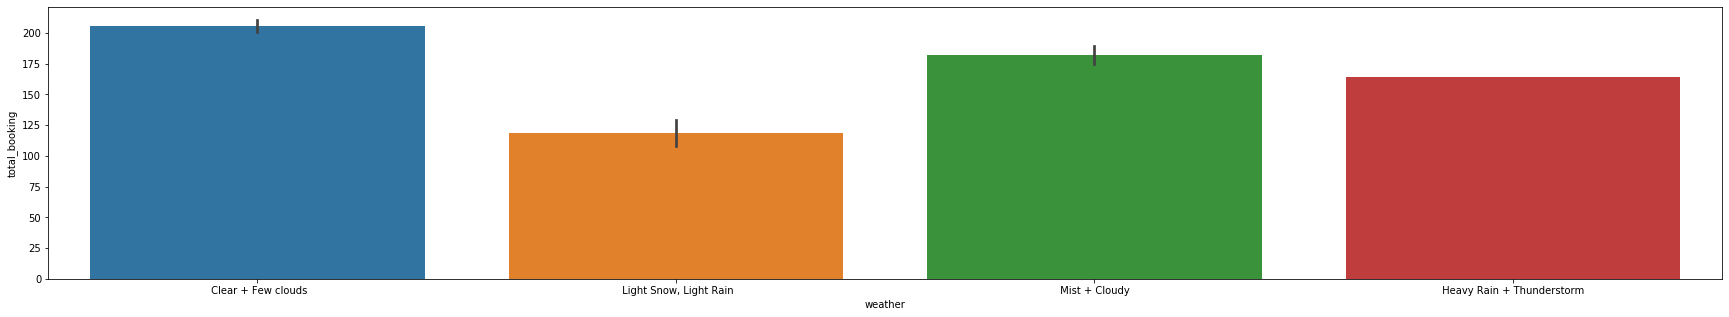

In [76]:
weather_df = train_df[['weather','total_booking']]
sns.barplot(data = weather_df,x='weather',y='total_booking')
plt.rcParams['figure.figsize'] = (30,5)

Data Analysis from Weather Vs Total Bookings:
- Number of bookings when it is Clear+Few Clouds is more 
- Next max number of bookings is when it is Mist+Cloudy
- From the above two points - it might be because most of them don't go out when it is too cool or it is thundering + heavy rain 

#### Temperature Vs Total Bookings:
    

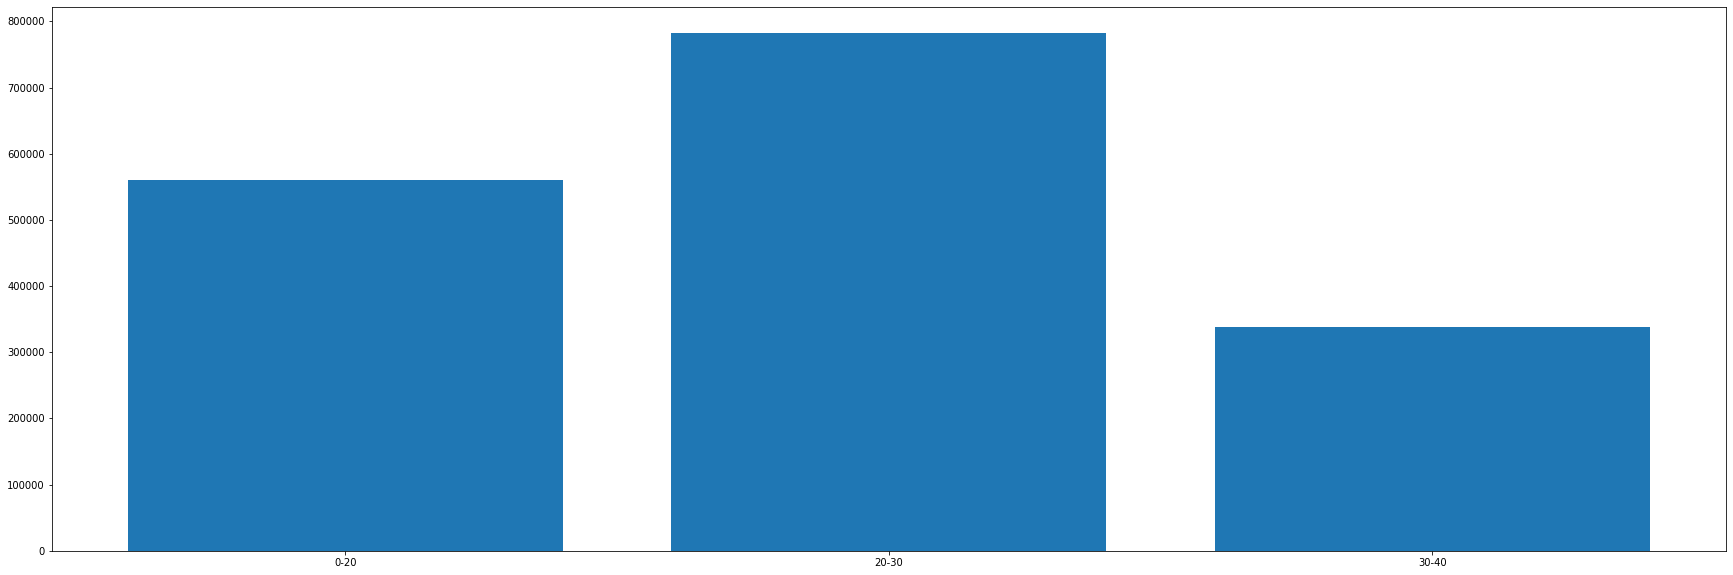

In [85]:
y1 = train_df[train_df['temp'] <20 ].sum()['total_booking']
y2 = train_df[(train_df['temp'] >= 20) & (train_df['temp'] <= 30)].sum()['total_booking']
y3 = train_df[(train_df['temp'] >= 30) & (train_df['temp'] <= 40)].sum()['total_booking']
y4 = [y1,y2,y3]
x4 = ['0-20','20-30','30-40']
plt.bar(x4,y4)
plt.show()
plt.rcParams['figure.figsize'] = (30,100)


Data Analysis from the Temperature Vs Total Bookings:
- Maximum number of bookings are during temperatures 20 - 30 : 20-30 is the most ideal temperature to go out it's neither to hot nor too cold
- While it is 0-20: It is the next maximum number of bookings: Which means people tend to book cabs more than when it is hot i.e., 30-40

## Outlier Analysis

#### Before Outlier Treatment 

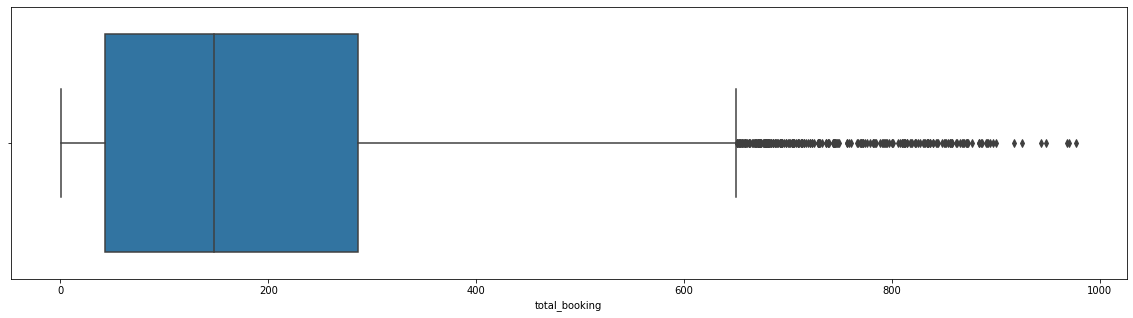

In [89]:
plot_data = sns.boxplot(x = train_df['total_booking'])
plt.rcParams['figure.figsize'] = (20,5)

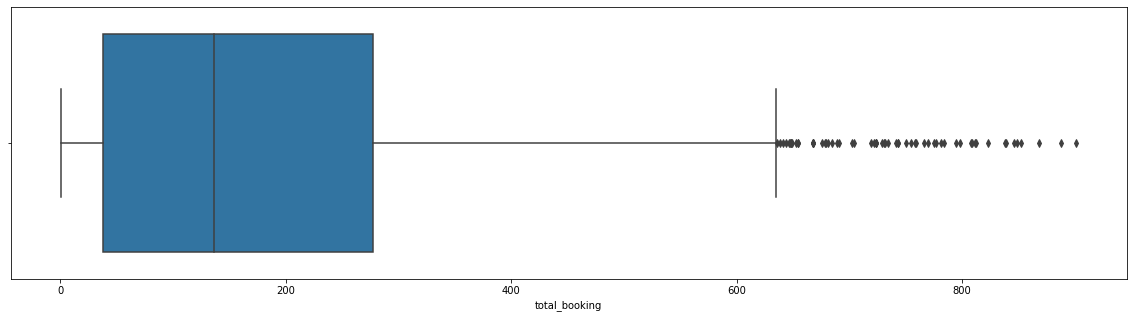

In [90]:
sns.boxplot(x = test_df['total_booking']) #for test data

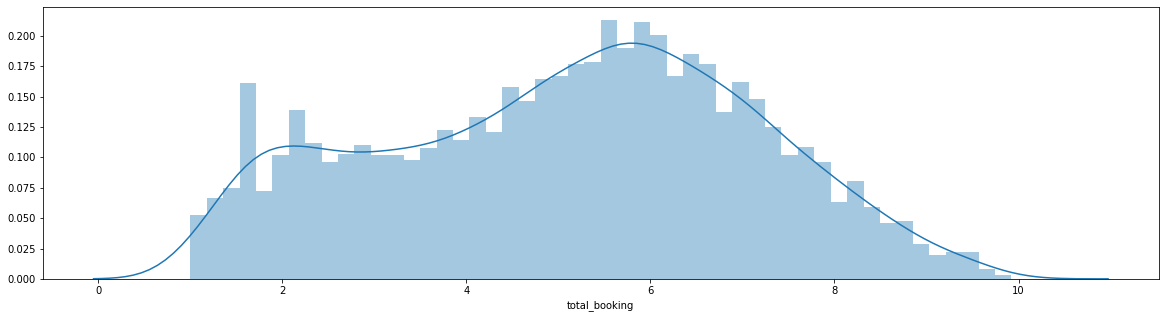

In [91]:
#skewness is removed by cuberoot of the data
sns.distplot(np.cbrt(train_df['total_booking']),bins=50)

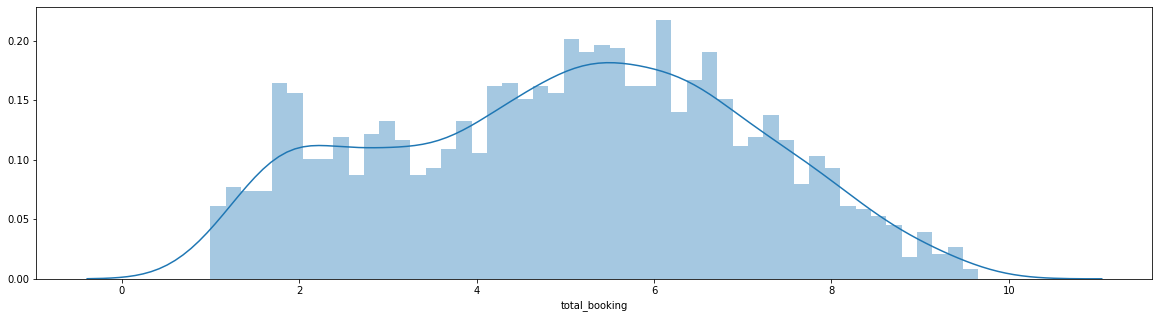

In [94]:
sns.distplot(np.cbrt(test_df['total_booking']),bins=50) #test data

####  After Outlier Treatment 

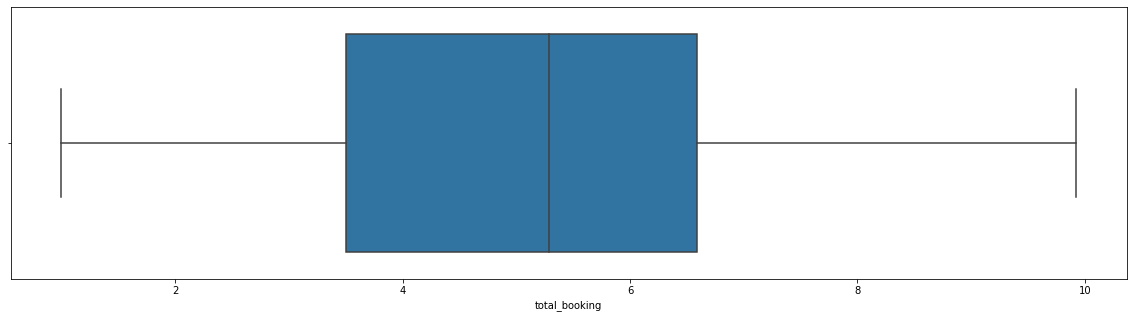

In [93]:
plot_data = sns.boxplot(x = np.cbrt(train_df['total_booking']))

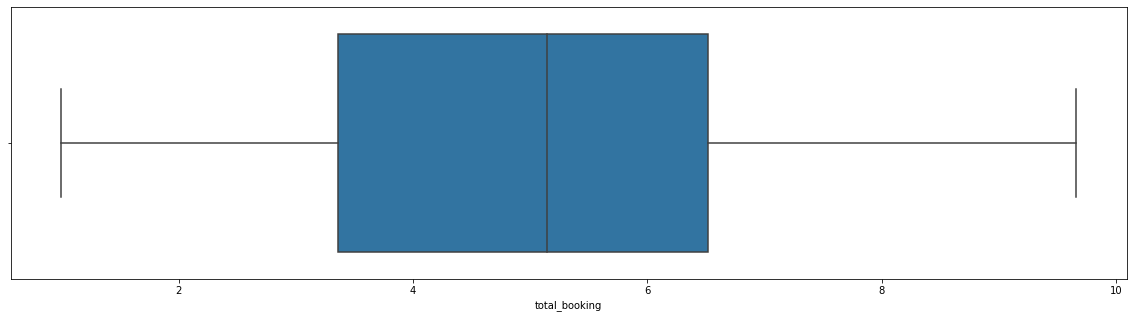

In [95]:
plot_data = sns.boxplot(x = np.cbrt(test_df['total_booking']))

From comparing the before and outlier treatment we can see that after outlier treatment all the outliers are removed 

In [97]:
#applying outlier treatment to data
outlier_df = train_df.copy()
outlier_df['total_booking'] = np.cbrt(outlier_df['total_booking'])
#for test
outlier_df_test = test_df.copy()
outlier_df_test['total_booking'] = np.cbrt(outlier_df_test['total_booking'])

## Missing Value Analysis

In [98]:
outlier_df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
WeekDay          0
Day              0
Time             0
Month            0
Year             0
dtype: int64

In [99]:
outlier_df_test.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
WeekDay          0
Day              0
Time             0
Month            0
Year             0
dtype: int64

In [100]:
outlier_df.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
WeekDay          0
Day              0
Time             0
Month            0
Year             0
dtype: int64

In [101]:
outlier_df_test.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
WeekDay          0
Day              0
Time             0
Month            0
Year             0
dtype: int64

From the above data we can say that there are no null values or Nan values in the dataset

## Correlation Analysis

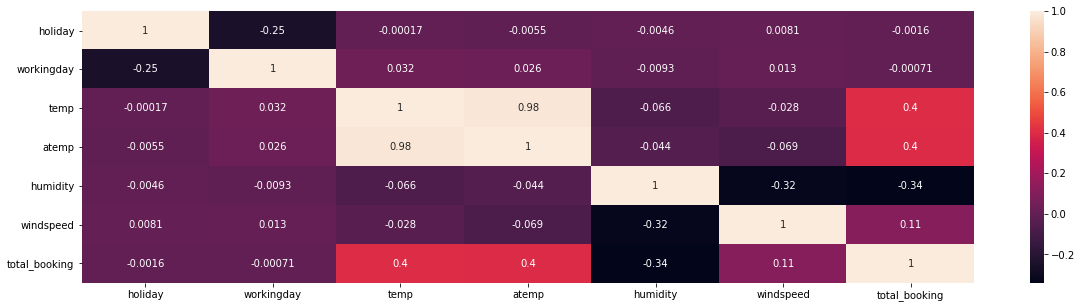

In [104]:
sns.heatmap(outlier_df.corr(),annot = True)

From the above heatmap we can see that some of the data like weather, month, hour, season are missed. 
This is because the data is not labelencoded

In [105]:
#labelEncoding and changing the data into integer/float types to have the correlation 
def weekday(weekday):
    weekday_dict = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
    return weekday_dict[weekday]
def month(month):
    month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
                  'October':10,'November':11,'December':12}
    return month_dict[month]
le = LabelEncoder()
#For train data
outlier_df['Month'] = outlier_df['Month'].apply(lambda x:month(x))
outlier_df['WeekDay'] = outlier_df['WeekDay'].apply(lambda x:weekday(x))
outlier_df['Hour'] = outlier_df['Time'].apply(lambda x:int(x[:2]))
outlier_df['weather'] = le.fit_transform(outlier_df['weather'])
outlier_df['season'] = le.fit_transform(outlier_df['season'])

#For test data
outlier_df_test['Month'] = outlier_df_test['Month'].apply(lambda x:month(x))
outlier_df_test['WeekDay'] = outlier_df_test['WeekDay'].apply(lambda x:weekday(x))
outlier_df_test['Hour'] = outlier_df_test['Time'].apply(lambda x:int(x[:2]))
outlier_df_test['weather'] = le.fit_transform(outlier_df_test['weather'])
outlier_df_test['season'] = le.fit_transform(outlier_df_test['season'])

In [106]:
#Checking the transformed Data
outlier_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,WeekDay,Day,Time,Month,Year,Hour
0,2012-05-02 19:00:00,2,0,1,0,22.14,25.760,77,16.9979,7.958114,2,02,19:00:00,5,2012,19
1,2012-09-05 04:00:00,0,0,1,0,28.70,33.335,79,19.0012,1.709976,2,05,04:00:00,9,2012,4
2,2011-01-13 09:00:00,1,0,1,0,5.74,6.060,50,22.0028,5.180101,3,13,09:00:00,1,2011,9
3,2011-11-18 16:00:00,3,0,1,0,13.94,16.665,29,8.9981,5.934472,4,18,16:00:00,11,2011,16
4,2011-09-13 13:00:00,0,0,1,0,30.34,33.335,51,19.0012,5.687734,1,13,13:00:00,9,2011,13


In [107]:
outlier_df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,WeekDay,Day,Time,Month,Year,Hour
0,2012-05-10 11:00:00,2,0,1,0,21.32,25.000,48,35.0008,6.349604,3,10,11:00:00,5,2012,11
1,2012-06-09 07:00:00,2,0,0,0,23.78,27.275,64,7.0015,4.431048,5,09,07:00:00,6,2012,7
2,2011-03-06 20:00:00,1,0,0,1,11.48,12.120,100,27.9993,2.223980,6,06,20:00:00,3,2011,20
3,2011-10-13 11:00:00,3,0,1,2,25.42,28.790,83,0.0000,4.379519,3,13,11:00:00,10,2011,11
4,2012-06-02 12:00:00,2,0,0,0,25.42,31.060,43,23.9994,8.741625,5,02,12:00:00,6,2012,12


All the data has been transformed 

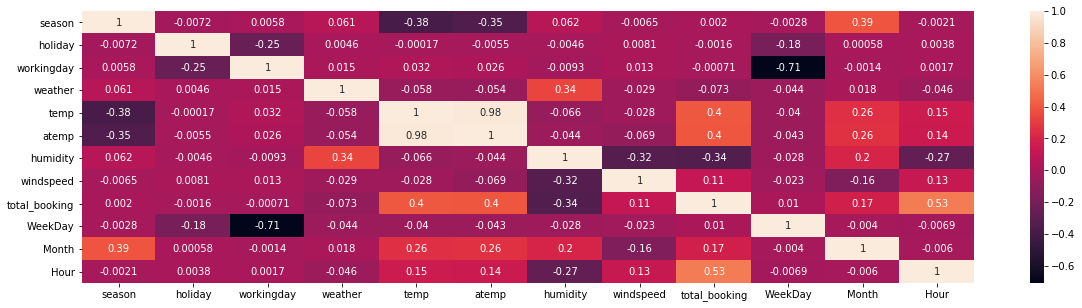

In [109]:
sns.heatmap(outlier_df.corr(),annot = True)

In [112]:
outlier_df.corr()['total_booking']

season           0.002002
holiday         -0.001590
workingday      -0.000705
weather         -0.072640
temp             0.403626
atemp            0.398889
humidity        -0.340372
windspeed        0.113318
total_booking    1.000000
WeekDay          0.010332
Month            0.174896
Hour             0.532507
Name: total_booking, dtype: float64

From the above data we can see that The target variable total_booking is highly correlated to Hour, 
Month, temp, atemp, WeekDay, WindSpeed than other features

## Feature Engineering

From the above point we can select the features which are highly correlated than others as mentioned

In [114]:
#Assigning features to train & test data
x_train = outlier_df[['Hour','Month','temp','windspeed','WeekDay']]
y_train = outlier_df['total_booking']
x_test = outlier_df_test[['Hour','Month','temp','windspeed','WeekDay']]
y_test = outlier_df_test['total_booking']


## Grid Search & Appending the models

#### Linear Regression 

In [120]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)
print('R_sqaure for LinearRegression:', r2_score(y_test,y_lr_pred))

R_sqaure for LinearRegression: 0.41186601338935935


#### Random Forest

In [122]:
rf = RandomForestRegressor()
param = {'n_estimators':[100],'random_state':list(range(11)),'max_features':[1,2,3,4,5]}
rf_GS = GridSearchCV(rf,param_grid = param, n_jobs = -1, cv = 5)
rf_GS.fit(x_train,y_train)
print('Best_parameter for RF:', rf_GS.best_params_)

Best_parameter for RF: {'max_features': 3, 'n_estimators': 100, 'random_state': 8}


In [125]:
y_rf_pred = rf_GS.predict(x_test)
print('R_sqaure for RandomForest:', r2_score(y_test,y_rf_pred))

R_sqaure for RandomForest: 0.8877651100063391


#### SVM 

In [130]:
svm = SVR(kernel='rbf')
param = {'kernel':['rbf'],'gamma':[0.001,0.01,0.1,1], 'C':[0.001,0.01,0.1,1,10]}
svm_GS = GridSearchCV(svm,param_grid = param , n_jobs = -1, cv = 5)
svm_GS.fit(x_train,y_train)
print('Best_parameter for svm:', svm_GS.best_params_)
y_svm_pred = svm_GS.predict(x_test)
print('R_sqaure for SVM:', r2_score(y_test,y_svm_pred))

Best_parameter for svm: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
R_sqaure for SVM: 0.835561982675489


#### Gradient Boosting Regression

In [131]:
gbr = GradientBoostingRegressor()
param = {'n_estimators':[25,50,75,100,125,150,175,200],'random_state':list(range(21)),'learning_rate':[0.01,0.1,1]}
gbr_GS = GridSearchCV(gbr,param_grid = param,n_jobs=-1,cv=5)
gbr_GS.fit(x_train,y_train)
print('Best_parameter for GBR:', gbr_GS.best_params_)
y_gbr_pred = gbr_GS.predict(x_test)
print('R_sqaure for GradientBoostingRegressor:', r2_score(y_test,y_svm_pred))

Best_parameter for GBR: {'learning_rate': 1, 'n_estimators': 200, 'random_state': 6}
R_sqaure for GradientBoostingRegressor: 0.835561982675489


#### DecisionTree

In [134]:
dt = DecisionTreeRegressor()
param = {'max_features':[1,2,3,4,5],'random_state':list(range(20))}
dt_GS = GridSearchCV(dt,param_grid = param,n_jobs=-1,cv=5)
dt_GS.fit(x_train,y_train)
print('Best_parameter for DecisionTree:', dt_GS.best_params_)
y_dt_pred = dt_GS.predict(x_test)
print('R_sqaure for DecisionTreeRegressor:', r2_score(y_test,y_dt_pred))

Best_parameter for DecisionTree: {'max_features': 4, 'random_state': 16}
R_sqaure for DecisionTreeRegressor: 0.7888955830258273


## Conclusion

All the models have been runned on the dataset as mentioned. After hyperparameter tuning these 
Regression models, RandomForest Regression model is found to perform best due to high r2_score. 
Also data visualization was done to check the interesting data insights. 